In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img,img_to_array

In [4]:
# Define the path to the directories containing train and test images
train_dir = '/content/drive/MyDrive/cat-dog1/train_set'
test_dir = '/content/drive/MyDrive/cat-dog1/test_set'


In [5]:
path = '/content/drive/MyDrive/cat-dog1/test_set/testing_set'
classes = os.listdir(path)
classes

['dog', 'cat']

In [6]:
# Parameters
batch_size = 32
img_height = 150
img_width = 150
epochs = 10

In [7]:
# Preprocess images and setup data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [8]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

Found 602 images belonging to 1 classes.


In [10]:
validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

Found 1007 images belonging to 1 classes.


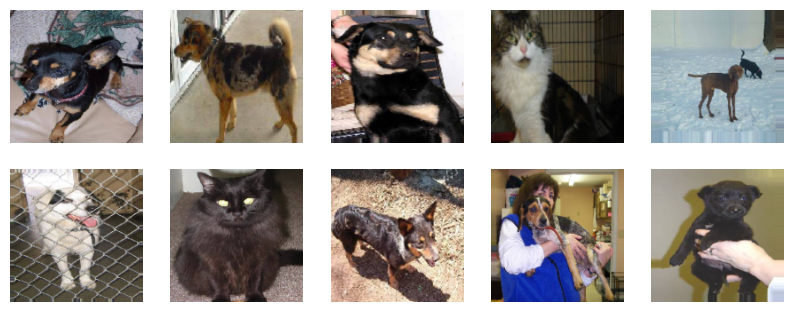

In [11]:
# Display 10 images from training dataset
x_train, y_train = train_generator.next()
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i])
    plt.axis('off')
plt.show()

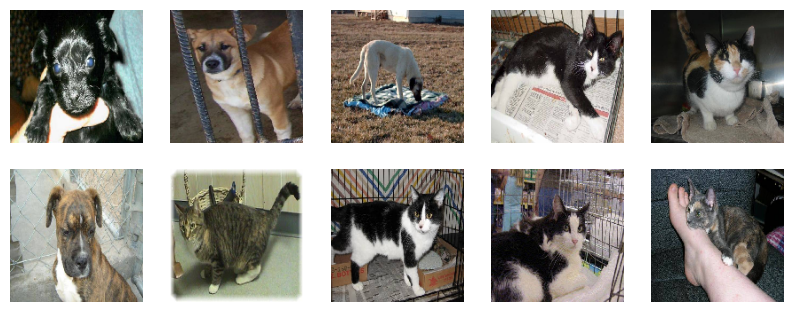

In [12]:
# Display 10 images from validation dataset
x_val, y_val = validation_generator.next()
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_val[i])
    plt.axis('off')
plt.show()

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    BatchNormalization(),
    Flatten(),
    Dropout(0.5),  # Adding dropout with a rate of 0.5
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 74, 74, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                        

In [16]:
#compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
#train the model
history=model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples//batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples//batch_size
)

Epoch 1/10
18/18 [==============================] - 275s 16s/step - loss: 0.1991 - accuracy: 0.9281 - val_loss: 4.4748e-04 - val_accuracy: 1.0000
Epoch 2/10
18/18 [==============================] - 61s 3s/step - loss: 0.0178 - accuracy: 0.9947 - val_loss: 4.6790e-07 - val_accuracy: 1.0000
Epoch 3/10
18/18 [==============================] - 59s 3s/step - loss: 1.8040e-05 - accuracy: 1.0000 - val_loss: 2.7829e-14 - val_accuracy: 1.0000
Epoch 4/10
18/18 [==============================] - 60s 3s/step - loss: 5.9909e-04 - accuracy: 1.0000 - val_loss: 1.0410e-17 - val_accuracy: 1.0000
Epoch 5/10
18/18 [==============================] - 81s 5s/step - loss: 2.8544e-06 - accuracy: 1.0000 - val_loss: 3.6891e-20 - val_accuracy: 1.0000
Epoch 6/10
18/18 [==============================] - 78s 4s/step - loss: 0.0071 - accuracy: 0.9982 - val_loss: 1.0141e-21 - val_accuracy: 1.0000
Epoch 7/10
18/18 [==============================] - 79s 4s/step - loss: 0.0091 - accuracy: 0.9982 - val_loss: 1.5809e-19 -

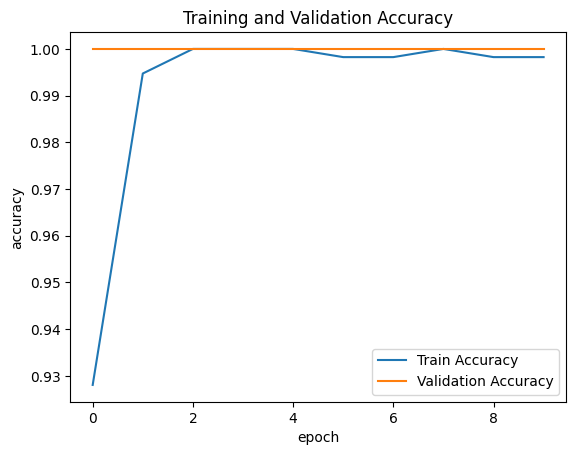

In [18]:
#plot training and validation accuracy
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

In [19]:
# Print train and test accuracy
train_loss, train_accuracy = model.evaluate(train_generator)
test_loss, test_accuracy = model.evaluate(validation_generator)
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

32/32 [==============================] - 20s 598ms/step - loss: 8.0109e-17 - accuracy: 1.0000
Train Accuracy: 1.0
Test Accuracy: 1.0


In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
# Function to check one image
def check_image(image_path):
    img = load_img(image_path, target_size=(img_height, img_width))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.

    prediction = model.predict(img_array)
    if prediction[0] > 0.5:
        print("Predicted: Dog")
    else:
        print("Predicted: Cat")

    plt.imshow(img)
    plt.axis('off')
    plt.show()

1/1 [==============================] - 0s 203ms/step
Predicted: Cat


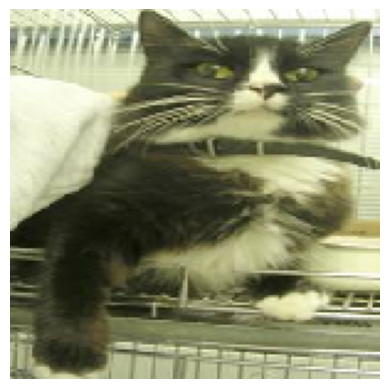

In [23]:
# Example usage
image_path = '/content/drive/MyDrive/cat-dog1/test_set/testing_set/cat/cat.4007.jpg'
check_image(image_path)